#TYPE OF PROBLEM
 The file Bank.csv contains data on 5000 customers. The data include customer
 demographic information (age, income, etc.), the customer's relationship      with the bank(mortgage, securities account, etc.), and the customer response to the last personal
loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was
offered to them in the earlier campaign.

**Objective**:
The classification goal is to predict the likelihood of a liability customer buying personal
loans.

Perform various different machine learning algorithms like  logistic regression, random forests, etc and differentiate between the models and analyse their performances.

# Importing files 


**STEP 1:Import the datasets and libraries**

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series,DataFrame
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
dt=pd.read_csv('bank.csv')

In [6]:
dt.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [7]:
dt.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


**STEP:1.2 Checking the types of data and basic summary**

In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [9]:
dt.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# Dropping irrelevent columns

 **STEP 2:If needed clean the data for any of the variables**

In [10]:
dt.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [11]:
dt.Online.sum()

2984

In [12]:
dt.Experience

0        1
1       19
2       15
3        9
4        8
        ..
4995     3
4996     4
4997    39
4998    40
4999     4
Name: Experience, Length: 5000, dtype: int64

In [13]:
experience= dt['Experience']
age= dt['Age']
correlation= experience.corr(age)
correlation

0.9942148569683321

In [14]:
dt = dt.drop(['ID','Experience'],axis=1)
dt.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


In [16]:
dt.head(10)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
5,37,29,92121,4,0.4,2,155,0,0,0,1,0
6,53,72,91711,2,1.5,2,0,0,0,0,1,0
7,50,22,93943,1,0.3,3,0,0,0,0,0,1
8,35,81,90089,3,0.6,2,104,0,0,0,1,0
9,34,180,93023,1,8.9,3,0,1,0,0,0,0


#  EDA

Why are we doing all these? Why can't we do directly modeling the data instead of knowing all these...Well in some cases we can easily come to conclusion if we just to do EDA. Then
there is no necessary for going through next models.

In [17]:
duplicate_rows_data = dt[dt.duplicated()]
print("Number of duplicate rows", duplicate_rows_data)

Number of duplicate rows Empty DataFrame
Columns: [Age, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []


In [18]:
dt = dt.dropna()
dt.count()


Age                   5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

In [19]:
dt.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [20]:
dt.drop('ZIP Code', axis=1)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


In [21]:
(dt.Mortgage == 0).sum()

3462

In [25]:
dt.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [26]:
dt.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [27]:
dt['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [28]:
dt['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

**Univariate Analysis**

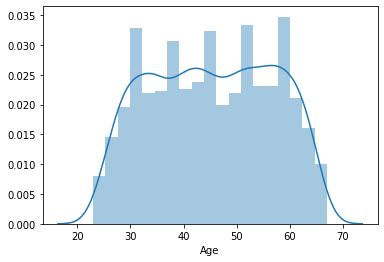

In [29]:
sns.distplot(dt.Age);

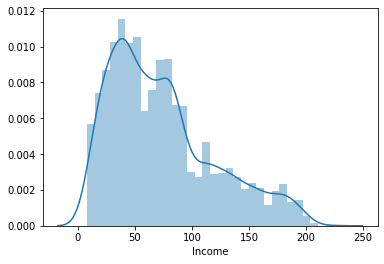

In [30]:
sns.distplot(dt.Income);

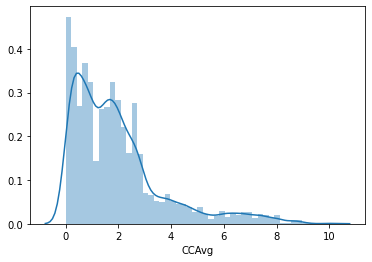

In [31]:
sns.distplot(dt.CCAvg);

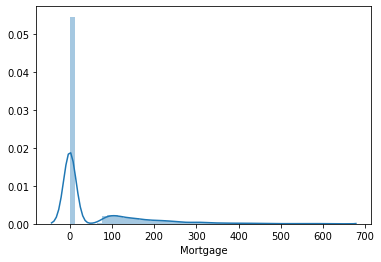

In [32]:
sns.distplot(dt.Mortgage);


 **Bivariate analysis**

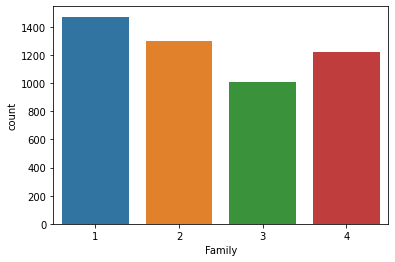

In [33]:
sns.countplot(dt.Family);

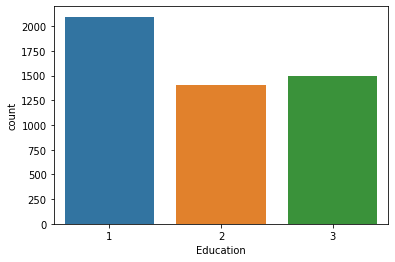

In [34]:
sns.countplot(dt.Education);

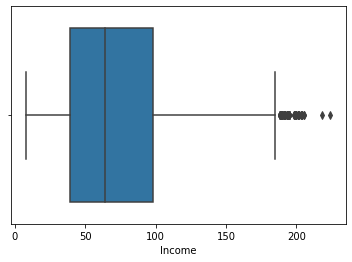

In [35]:
sns.boxplot(x=dt['Income'])

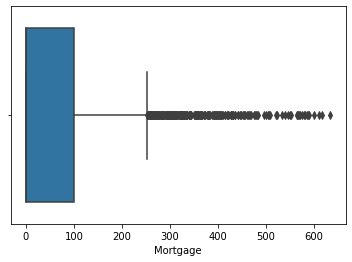

In [36]:
sns.boxplot(x=dt['Mortgage'])

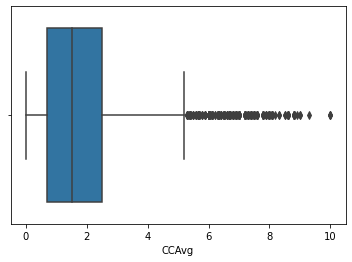

In [37]:
sns.boxplot(x=dt['CCAvg'])

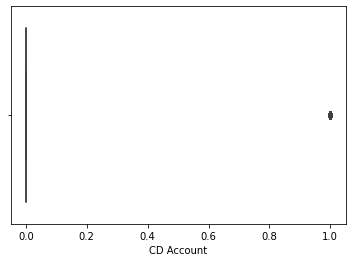

In [38]:
sns.boxplot(x=dt['CD Account'])

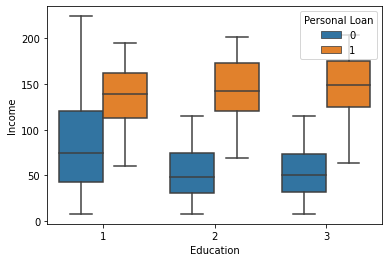

In [39]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=dt);

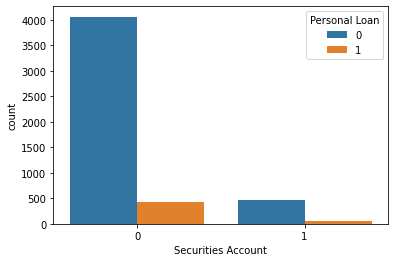

In [40]:
sns.countplot(x='Securities Account', data= dt, hue='Personal Loan');

In [42]:
counts = dt['Income'].value_counts()*100/sum(dt['Income'].value_counts())
print(counts)

44     1.70
38     1.68
81     1.66
41     1.64
39     1.62
       ... 
189    0.04
202    0.04
205    0.04
224    0.02
218    0.02
Name: Income, Length: 162, dtype: float64


In [44]:
popular_labels = counts.index[:10]


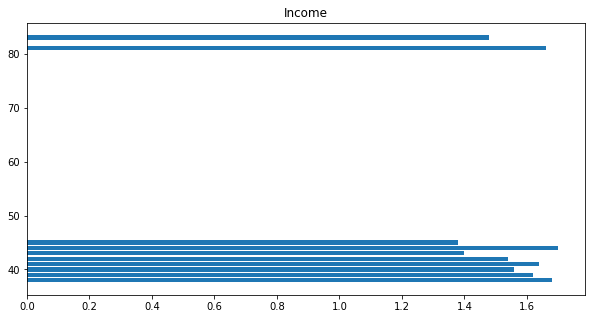

In [46]:
plt.figure(figsize = (10,5))
plt.barh(popular_labels, width = counts[:10])
plt.title('Income')
plt.show()

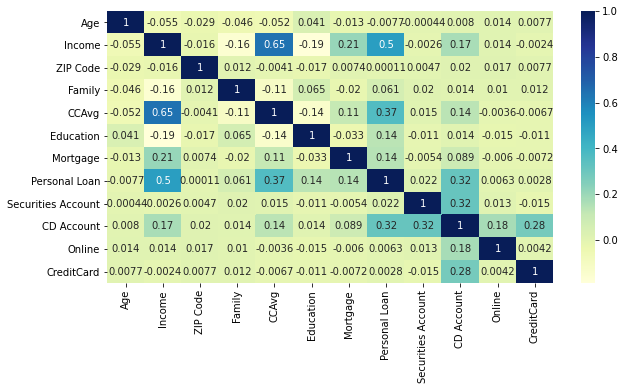

In [48]:
plt.figure(figsize=(10,5))
c = dt.corr()
sns.heatmap(c,cmap = "YlGnBu",annot = True)

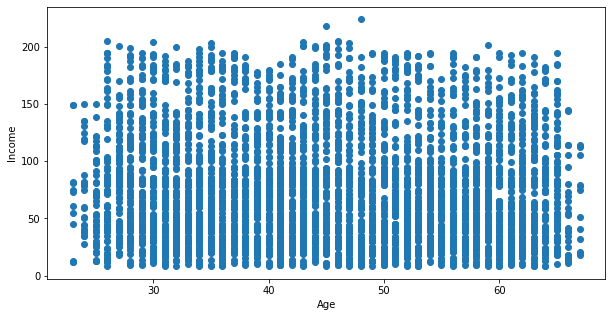

In [49]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(dt['Age'],dt['Income'])
ax.set_xlabel('Age')
ax.set_ylabel('Income')
plt.show()

elder person having more no of credit cards

Text(0.5, 0, 'Age')

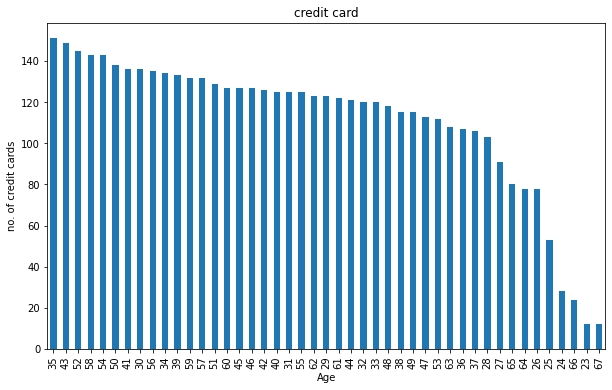

In [50]:
dt['Age'].value_counts().plot.bar(figsize = (10,6))
plt.title("credit card")
plt.ylabel('no. of credit cards')
plt.xlabel('Age')

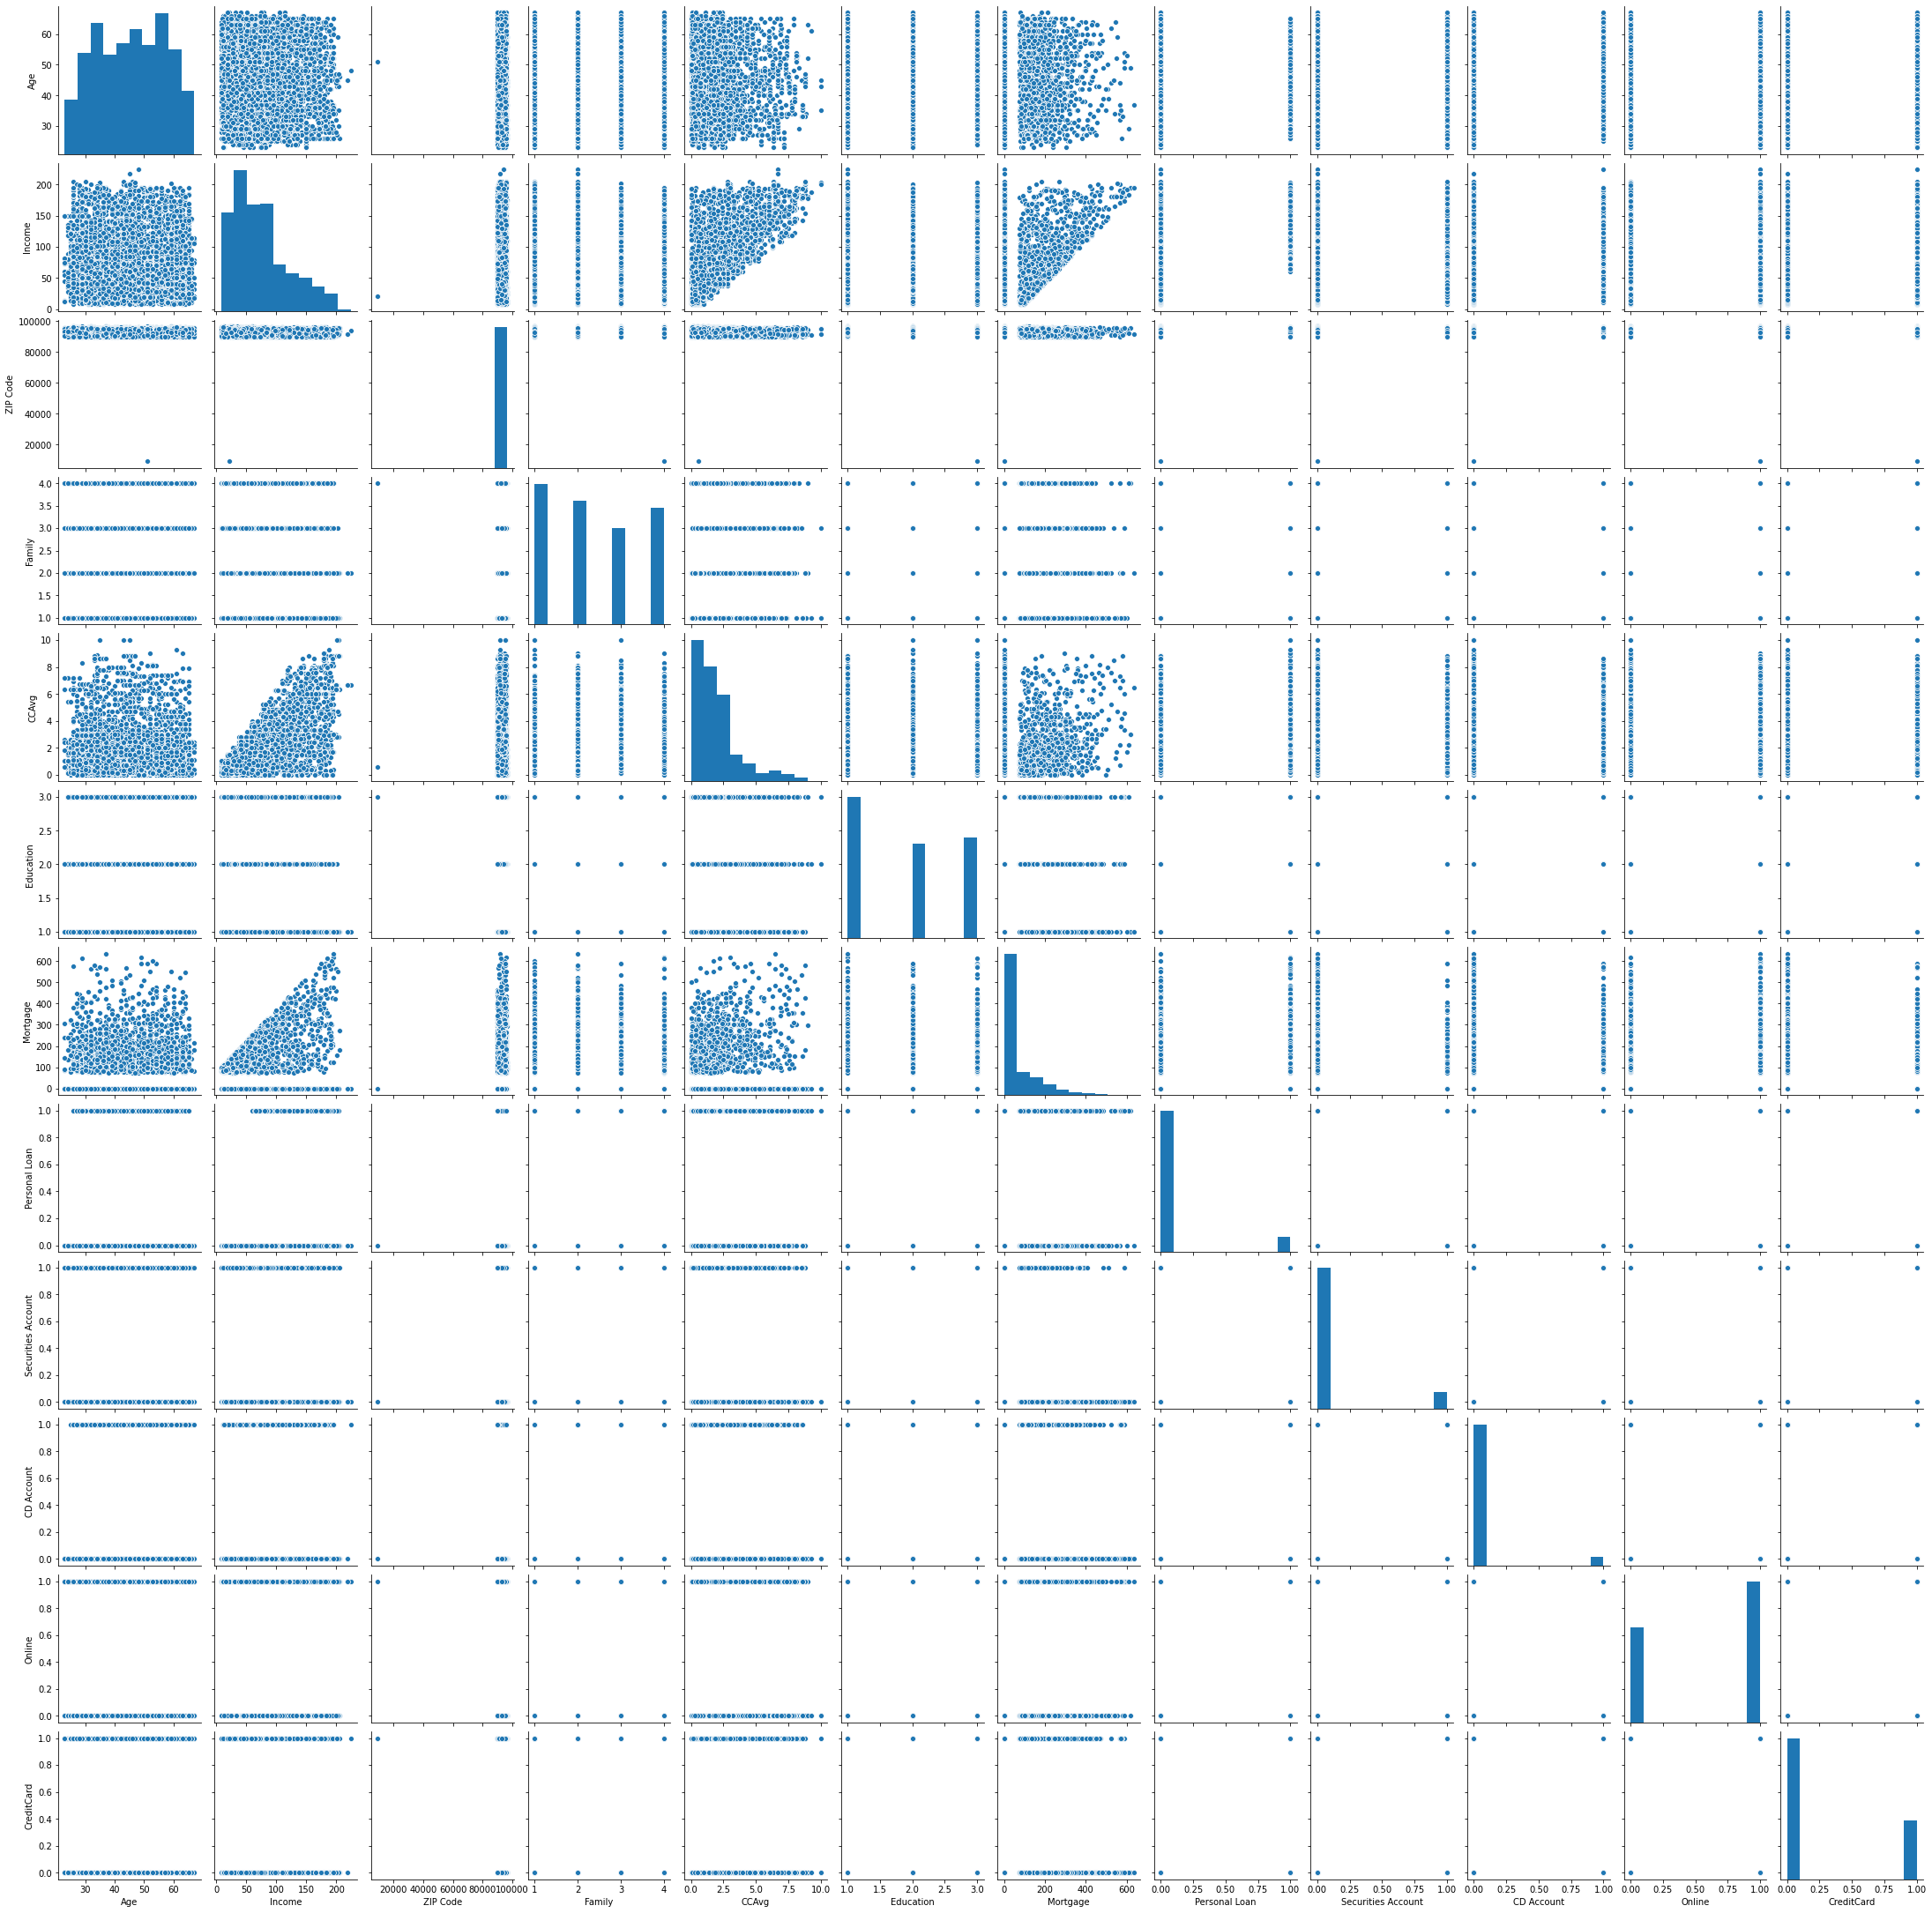

In [51]:
sns.pairplot(dt)

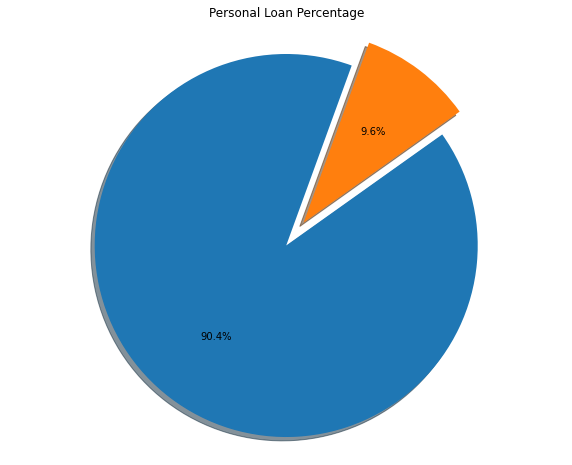

In [52]:
DF=pd.DataFrame(dt['Personal Loan'].value_counts()).reset_index()
DF.columns=['Labels','Personal Loan']
fig1,ax1=plt.subplots(figsize=(10,8))
explode=(0,0.15)
ax1.pie(DF['Personal Loan'],explode=explode,autopct='%1.1f%%',shadow=True,startangle=70)
ax1.axis('equal')
plt.title('Personal Loan Percentage')
plt.show()

# Split the data into training and test set

In [53]:
x=dt[['Age', 'Income', 'CCAvg', 'Education' ,'Mortgage' ,'Securities Account']]
y=dt['Personal Loan'].values

In [55]:
from sklearn.preprocessing import MinMaxScaler
columns_to_scale = ['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage']

for column in columns_to_scale:
    scaler = MinMaxScaler()
    dt[column] = scaler.fit_transform(dt[column].values.reshape(-1, 1))
    
dt.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0.045455,0.189815,91107,1.000000,0.16,0.0,0.0,0,1,0,0,0
1,0.500000,0.120370,90089,0.666667,0.15,0.0,0.0,0,1,0,0,0
2,0.363636,0.013889,94720,0.000000,0.10,0.0,0.0,0,0,0,0,0
3,0.272727,0.425926,94112,0.000000,0.27,0.5,0.0,0,0,0,0,0
4,0.272727,0.171296,91330,1.000000,0.10,0.5,0.0,0,0,0,0,1


In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)


In [57]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3500, 6) (1500, 6) (3500,) (1500,)


In [58]:
class_names = ['wont take loan', 'take loan']

# Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression



In [60]:
model = LogisticRegression()


In [61]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
y_predict=model.predict(x_test)

In [63]:
print(y_predict)

[0 0 0 ... 0 0 0]


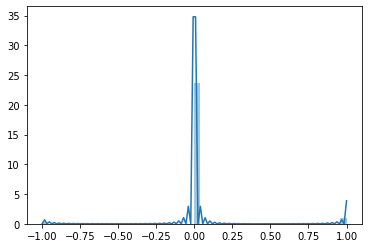

In [64]:
sns.distplot((y_test - y_predict),bins = 50)

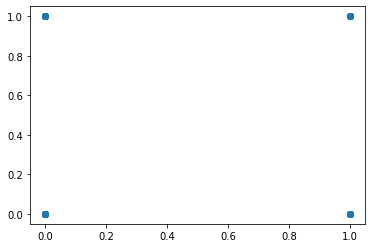

In [65]:
plt.scatter(y_test,y_predict)

In [66]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import precision_score, recall_score

Logistic Regression Results: 
Training Accuracy: 0.94
Testing Accuracy: 0.95
Precision: 0.78
Recall: 0.57


Text(0.5, 1.0, 'Precision-Recall Curve for Logistic Regression')

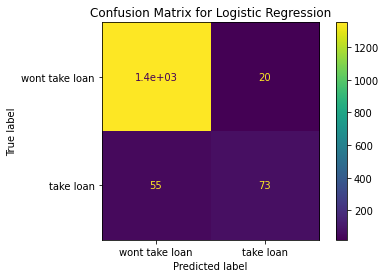

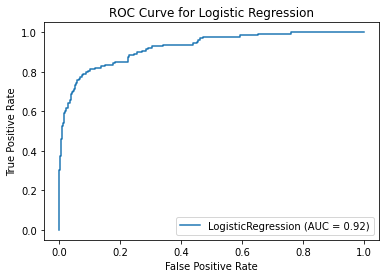

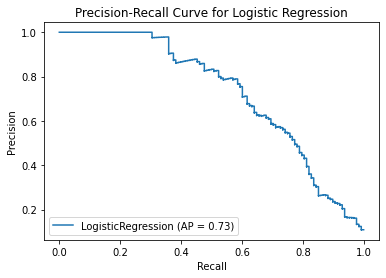

In [67]:
print('Logistic Regression Results: ')

train_score = model.score(x_train,y_train)
print('Training Accuracy:', train_score.round(2))
test_score = model.score(x_test, y_test)
print('Testing Accuracy:', test_score.round(2))

precision_logi = precision_score(y_test, y_predict, labels=class_names).round(2)
print('Precision:', precision_logi)
recall_logi = recall_score(y_test, y_predict).round(2)
print('Recall:', recall_logi)

plot_confusion_matrix(model, x_test, y_test, display_labels=class_names)
plt.title('Confusion Matrix for Logistic Regression')

plot_roc_curve(model, x_test, y_test)
plt.title('ROC Curve for Logistic Regression')

plot_precision_recall_curve(model, x_test, y_test)
plt.title('Precision-Recall Curve for Logistic Regression')






#random forest

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
r_clf = RandomForestClassifier(n_estimators=300, max_depth=7,n_jobs=-1 )
r_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

Random Forest Classifier Results: 
Training Accuracy: 0.98
Testing Accuracy: 0.97
Precision: 0.95
Recall: 0.69


Text(0.5, 1.0, 'Precision-Recall Random Forest Classifier')

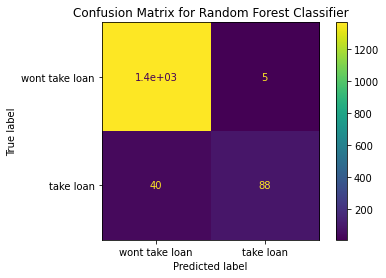

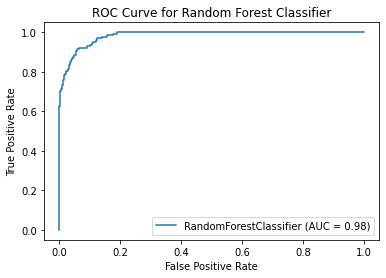

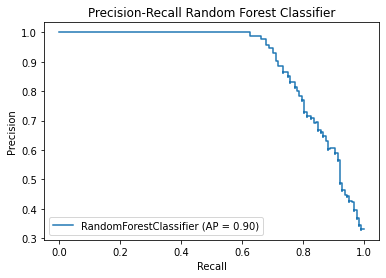

In [70]:
print('Random Forest Classifier Results: ')

train_score = r_clf.score(x_train, y_train)
print('Training Accuracy:', train_score.round(2))
test_score = r_clf.score(x_test, y_test)
print('Testing Accuracy:', test_score.round(2))

y_predict = r_clf.predict(x_test)

precision_r = precision_score(y_test, y_predict, labels=class_names).round(2)
print('Precision:', precision_r)
recall_r = recall_score(y_test, y_predict).round(2)
print('Recall:', recall_r)

plot_confusion_matrix(r_clf, x_test, y_test, display_labels=class_names)
plt.title('Confusion Matrix for Random Forest Classifier')

plot_roc_curve(r_clf, x_test, y_test)
plt.title('ROC Curve for Random Forest Classifier')

plot_precision_recall_curve(r_clf, x_test, y_test)
plt.title('Precision-Recall Random Forest Classifier')

#KNN

In [71]:
 from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn=KNeighborsClassifier(n_neighbors=15,weights='uniform',metric='euclidean')
knn.fit(x_train,y_train)
y_predict=knn.predict(x_test)

KNN Classifier Results: 
Training Accuracy: 0.92
Testing Accuracy: 0.92
Precision: 0.52
Recall: 0.23


Text(0.5, 1.0, 'Precision-Recall KNN Classifier ')

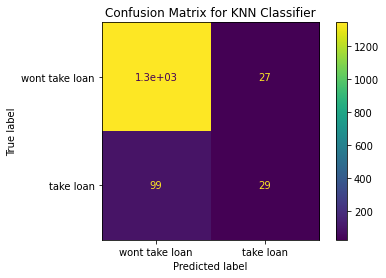

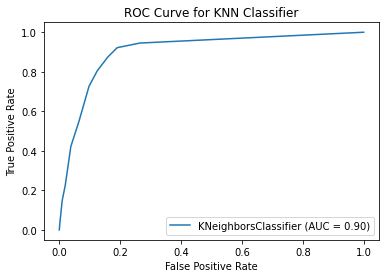

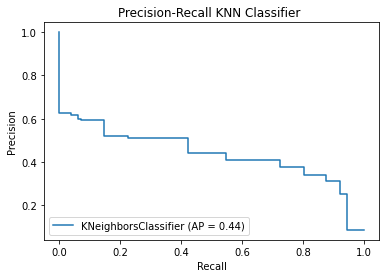

In [75]:
print('KNN Classifier Results: ')

train_score = knn.score(x_train, y_train)
print('Training Accuracy:', train_score.round(2))
test_score = knn.score(x_test, y_test)
print('Testing Accuracy:', test_score.round(2))

y_predict = knn.predict(x_test)

precision_knn = precision_score(y_test, y_predict, labels=class_names).round(2)
print('Precision:', precision_knn)
recall_knn = recall_score(y_test, y_predict).round(2)
print('Recall:', recall_knn)

plot_confusion_matrix(knn, x_test, y_test, display_labels=class_names)
plt.title('Confusion Matrix for KNN Classifier')

plot_roc_curve(knn, x_test, y_test)
plt.title('ROC Curve for KNN Classifier')

plot_precision_recall_curve(knn, x_test, y_test)
plt.title('Precision-Recall KNN Classifier ')

# conclusion

In [ ]:
#LRR
#Logistic Regression Results: 
#Training Accuracy: 0.94
#Testing Accuracy: 0.95
#Precision: 0.79
#Recall: 0.57

#RFC
#Random Forest Classifier Results: 
#Training Accuracy: 0.98
#Testing Accuracy: 0.97
#Precision: 0.95
#Recall: 0.69

#KNN
#KNN Classifier Results: 
#Training Accuracy: 0.92
#Testing Accuracy: 0.92
#Precision: 0.52
#Recall: 0.23

In [ ]:
#RFC model performs the best, evident from above results. 
#The training Accuracy and testing accuracy as got is 98% and 97% which is to good.
#true picture of market i.e. person who took loan are on lower side.
#If we apply the model and change our approach and target only those predicted as yes first, it is 95% (Precision)
#chance they will take loan. Hence our chances that a person takes personal loan increases.


In [76]:
#To conclude, we have applied what we have learned till now. Further to this we can apply technique like bayes theorem,SVM
#decesion trees etc and use regularization and then compare the results to see if model improves further.
